# Final Assignment 52002/52019 - 2023-24 - Part 1 BigQuery & SQL [35 pts]


BigQuery is Google's serverless data warehouse that enables scalable analysis   
over petabytes of data. It is a Platform as a Service (PaaS) that supports querying   
using SQL. In this part of the midterm you'll be asked to query BigQuery tables    
using its python API. Please use the `sandbox` BigQuery environment and query   
only public datasets.

**Grading:**
Each subquestion in this part is worth **5** points for the final work grade.

**Please note:**
Your BigQuery's resources are limited to 1 TB per user per month - be mindful with how many queries you   
execute and try to optimize your queries as much as possible.


**Guidelines:**  
1. Fill this notebook with python commands including SQL queries in the designated places,  
 run it using a jupyter notebook environment (e.g. google colab), save the resulting   
 ipynb file with the results before submitting.
2. Please write efficient SQL queries and code. Points may be taken off for     
    inefficient queries and code.
3. The python API enables us to write code that interacts with BigQuery and convert   
between the SQL tables to python objects, thus allowing analysis and plotting using   
python code. You should write your SQL commands within the API. It is recommended to   
browse the dataset in the BigQuery web-browser, and try running your SQL command  
 there before copying it to the python notebool.      
4. Please only use the method `dataframe.plot.[kind]()` to create visuzalizations,   
where `[kind]` refers to the type of plot that you want to use.
   In addition, your plots should be clear, with titles, and with propoer x-y labels.
5. When reading BigQuery tables, used the `` symbols to around the table's name.  
6. Please make sure yout figures are legible/readible.    
7. You can use the sample `bigquery_sample_python_notebook` for some query examples.   


FOR SUBMISSION:
PLEASE SUBMIT THE FOLLOWING:
1. Your fully executed IPYNB file (with the expected output)
2. A PDF/HTML import of your executed IPYNB file (with the expected output)

SUBMISSIONS WITHOUT OUTPUTS WILL NOT BE GRADED!!

Requirements:
- `google-cloud` client library + `google-cloud-bigquery`    
  (https://cloud.google.com/python/docs/reference/bigquery/latest)
- Google Cloud authentication:
  In your linux shell , execute:   
  `gloud init` and then also
  `gcloud auth application-default login` and  follow instructions.

**Necessary Libraries:**  
(Do not use any libraries that are not in this list without permission form the course staff)

In [1]:
import pandas as pd
import matplotlib as plt
from google.cloud import bigquery
from sqlite3 import connect

In [2]:
# Construct a BigQuery client
my_project_name = "my-first-project-411309" # fill in your project's name
client = bigquery.Client(project=my_project_name)

San Francisco datasets

In [3]:
san_fan_films_locs = "bigquery-public-data.san_francisco.film_locations"
san_fan_service_reqs = "bigquery-public-data.san_francisco.311_service_requests"
san_fan_pd_incidents = "bigquery-public-data.san_francisco.sfpd_incidents"
san_fan_fd_incidents = "bigquery-public-data.san_francisco.sffd_service_calls"

### Q1) Basic Usage

Q1.a) Execute a query that select 1000 rows from `bigquery-public-data.san_francisco.film_locations`,    
then saves the results using the `.results()` method. Finally print the first 2 rows.

SOLUTION:

In [4]:
# Insert query below between the two triple-parenthesis
QUERY = ("""SELECT * 
            FROM {} 
            LIMIT 1000 """.format(san_fan_films_locs))
query_job_1a = client.query(QUERY)  # API request
results_1a = query_job_1a.result()  # Waits for query to finish

 # Add code here to print the results
results = list(results_1a)  # Transforming the RowIterator into a list to prevent multiple iterations
for row in results[:2]:
    print(row)
    

Row(('A Jitney Elopement', 1915, '20th and Folsom Streets', '', 'The Essanay Film Manufacturing Company', 'General Film Company', 'Charles Chaplin', 'Charles Chaplin', 'Charles Chaplin', 'Edna Purviance', ''), {'title': 0, 'release_year': 1, 'locations': 2, 'fun_facts': 3, 'production_company': 4, 'distributor': 5, 'director': 6, 'writer': 7, 'actor_1': 8, 'actor_2': 9, 'actor_3': 10})
Row(('A Jitney Elopement', 1915, 'Golden Gate Park', 'During San Francisco\'s Gold Rush era, the Park was part of an area designated as the "Great Sand Waste".', 'The Essanay Film Manufacturing Company', 'General Film Company', 'Charles Chaplin', 'Charles Chaplin', 'Charles Chaplin', 'Edna Purviance', ''), {'title': 0, 'release_year': 1, 'locations': 2, 'fun_facts': 3, 'production_company': 4, 'distributor': 5, 'director': 6, 'writer': 7, 'actor_1': 8, 'actor_2': 9, 'actor_3': 10})


Q1.b) Using the saved results object from the query in (1.a), load the results  
into a pandas DataFrame.
Hint: you can retrieve the header using `query.result().schema`.  
Print the first 5 rows of the dataframe.

SOLUTION:

In [5]:
# Add code here to print the results
schema = results_1a.schema
df_a = pd.DataFrame([row.values() for row in results],
                  columns=[field.name for field in schema])
df_a.head()


,title,release_year,locations,fun_facts,production_company,distributor,director,writer,actor_1,actor_2,actor_3
0,A Jitney Elopement,1915,20th and Folsom Streets,,The Essanay Film Manufacturing Company,General Film Company,Charles Chaplin,Charles Chaplin,Charles Chaplin,Edna Purviance,
1,A Jitney Elopement,1915,Golden Gate Park,"During San Francisco's Gold Rush era, the Park...",The Essanay Film Manufacturing Company,General Film Company,Charles Chaplin,Charles Chaplin,Charles Chaplin,Edna Purviance,
2,San Francisco,1936,The Barbary Coast,The Barbary Coast was a red-light district tha...,Metro-Goldwyn Mayer,Metro-Goldwyn Mayer,W.S. Van Dyke,Anita Loos,Clark Gable,Jeanette MacDonald,Spencer Tracy
3,San Francisco,1936,City Hall,The dome of SF's City Hall is almost a foot ta...,Metro-Goldwyn Mayer,Metro-Goldwyn Mayer,W.S. Van Dyke,Anita Loos,Clark Gable,Jeanette MacDonald,Spencer Tracy
4,After the Thin Man,1936,Coit Tower,The Tower was funded by a gift bequeathed by L...,Metro-Goldwyn Mayer,Metro-Goldwyn Mayer,W.S. Van Dyke,Frances Goodrich,William Powell,Myrna Loy,James Stewart


Q1.c) Query the table to get the number of total distinct films that were filmed in San Francisco in each year in a decreasing order (by year).  
Using the method `.plot` on a dataframe, display the results visually (you do not need to print the output table of the query itself).   
What was the year with most films released?


SOLUTION:

The year with most films released was 2015

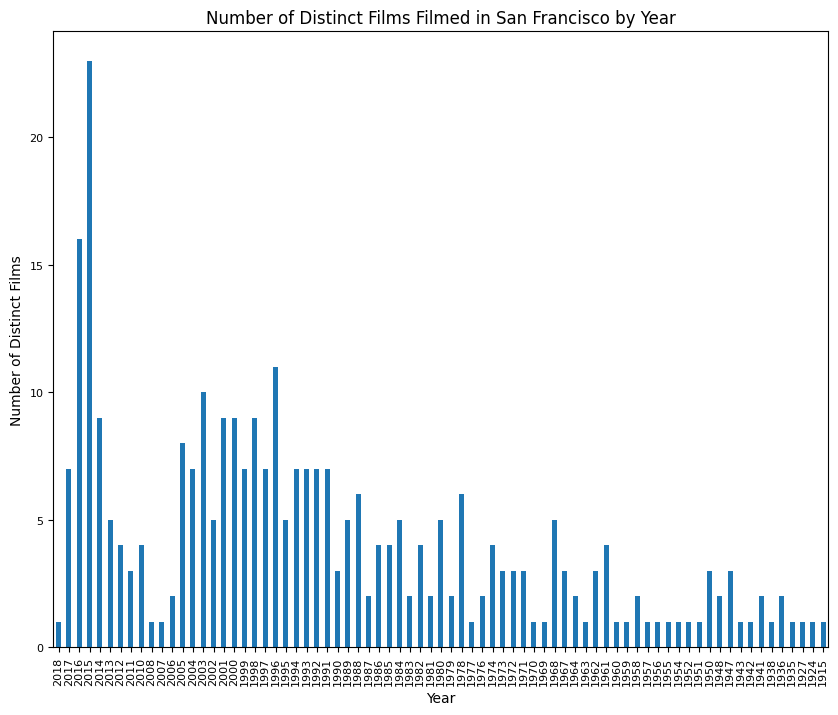

In [6]:
# Insert query below between the two triple-parenthesis
QUERY = ("""SELECT COUNT(DISTINCT title) as number_distinct_films, release_year
FROM {}
GROUP BY release_year
ORDER BY release_year DESC
    """.format(san_fan_films_locs))
query_job_1c = client.query(QUERY)  # API request
results_1c = query_job_1c.result()  # Waits for query to finish

# Add code here to plot the results
schema = results_1c.schema
df_c = pd.DataFrame([row.values() for row in results_1c],
                  columns=[field.name for field in schema])
plot = df_c.plot.bar(x='release_year', y='number_distinct_films',
                    legend=False,
                    title = 'Number of Distinct Films Filmed in San Francisco by Year',
                    xlabel = 'Year',
                    ylabel = 'Number of Distinct Films',
                    fontsize=8,
                    figsize = (10,8))


Q1.d) Query the table to get the most popular filming locations.  
Using the method `.plot` on a dataframe, display the results visually, with locations sorted by popularity.   


SOLUTION:

Here, I've shortened the length of the location names, omitting any words in parentheses, to improve understanding and visualization.

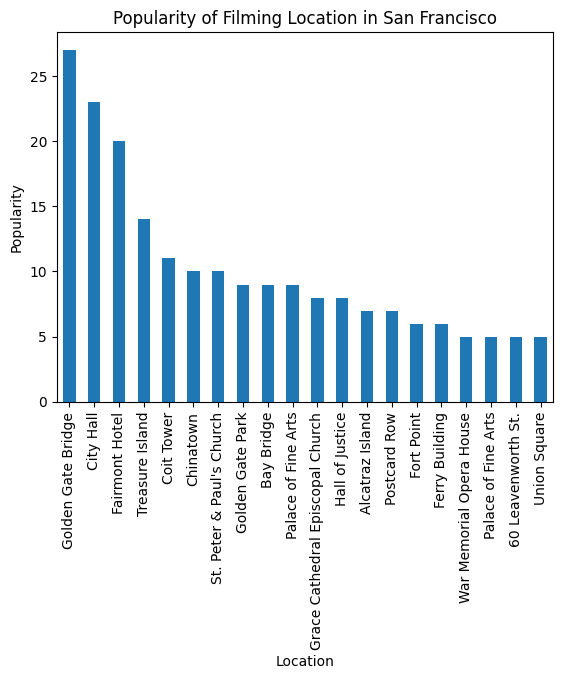

In [7]:
# Write query code, run it using the API and plot the results
QUERY = ("""SELECT locations , COUNT(*) as popularity
FROM {}
GROUP BY locations
ORDER BY popularity DESC
    """.format(san_fan_films_locs))
query_job_1d = client.query(QUERY)  # API request
results_1d = query_job_1d.result()  # Waits for query to finish

schema = results_1d.schema
df_d = pd.DataFrame([row.values() for row in results_1d],
                  columns=[field.name for field in schema])
df_d = df_d.replace({'': None})  # Removed location ''
df_d = df_d.dropna(subset=['locations'])
df_d['locations'] = df_d['locations'].str.replace(r'\(.*?\)', '', regex=True).str.strip() # Removing parenthesis for better visualization
top_20_locations = df_d.head(20)
plot = top_20_locations.plot.bar(x='locations', y='popularity',legend=False,
                    title = 'Popularity of Filming Location in San Francisco',
                    xlabel ='Location',
                    ylabel = 'Popularity',)


### Q2) San Francisco Police and Fire Department calls/incidents

Q2.a) For the `san_fan_pd_incidents` table
write a query that returns the most common `category` for each `weekday`.  Print the resulting table with one row per day of the week.   
Hint: there are many ways to achieve it, it is recommended to simplify the query     
using `WITH` table and a window function.

In [8]:
# Write query code, run it using the API and print the results
QUERY = ("""WITH common_cat AS(
SELECT COUNT(category) AS count_category,
 dayofweek,
 category,
ROW_NUMBER() OVER (PARTITION BY dayofweek ORDER BY COUNT(category) DESC) AS category_rank
FROM {} 
GROUP BY dayofweek,category
)
SELECT category,dayofweek
FROM common_cat
WHERE category_rank = 1""".format(san_fan_pd_incidents))
query_job_2a = client.query(QUERY)  # API request
results_2a = query_job_2a.result()
schema_2a = results_2a.schema
df_2a = pd.DataFrame([row.values() for row in results_2a],
                  columns=[field.name for field in schema_2a])
print(df_2a)



        category  dayofweek
0  LARCENY/THEFT   Thursday
1  LARCENY/THEFT    Tuesday
2  LARCENY/THEFT  Wednesday
3  LARCENY/THEFT     Friday
4  LARCENY/THEFT     Monday
5  LARCENY/THEFT   Saturday
6  LARCENY/THEFT     Sunday


Q2.b) Repeat Q2.a for the  `san_fan_fd_incidents` table, but this time for `call_type`.  
Hint: you need to retrieve the day of week first. You may use the CASE command

In [9]:
# Write query code, run it using the API and print the results
QUERY = ("""WITH common_call AS(
SELECT
 EXTRACT(DAYOFWEEK FROM call_date) AS day_of_week,
 call_type
FROM {}
),
  rank_table AS (
  SELECT call_type,
  day_of_week,
  ROW_NUMBER() OVER (PARTITION BY day_of_week ORDER BY COUNT(call_type) DESC) AS call_type_rank
  FROM common_call
  GROUP BY day_of_week,call_type
  )

SELECT call_type,
CASE 
    WHEN day_of_week = 1 THEN 'Sunday'
    WHEN day_of_week = 2 THEN 'Monday'
    WHEN day_of_week = 3 THEN 'Tuesday'
    WHEN day_of_week = 4 THEN 'Wednesday'
    WHEN day_of_week = 5 THEN 'Thursday'
    WHEN day_of_week = 6 THEN 'Friday'
    ELSE 'Saturday'
  END as dayofweek
FROM rank_table 
WHERE call_type_rank = 1

""".format(san_fan_fd_incidents))
query_job_2b = client.query(QUERY)  # API request
results_2b = query_job_2b.result()
schema_2b = results_2b.schema
df_2b = pd.DataFrame([row.values() for row in results_2b],
                  columns=[field.name for field in schema_2b])
print(df_2b)


          call_type  dayofweek
0  Medical Incident   Thursday
1  Medical Incident     Sunday
2  Medical Incident    Tuesday
3  Medical Incident     Friday
4  Medical Incident     Monday
5  Medical Incident   Saturday
6  Medical Incident  Wednesday


Q2.c) Join the two tables of incidents and service calls form the previous two sub-questions on `dayofweek`, and count how many incidents  
 for each day of the week are recieved by each department.
 Load the results into a dataframe,  
 and using the method `plot` display the results. Is there a clear trend?


SOLUTION:

In the plot, we can observe that the number of incidents for both departments appears to follow a uniform distribution across the days of the week. However, the maximum number of incidents for both departments occurs on Friday.

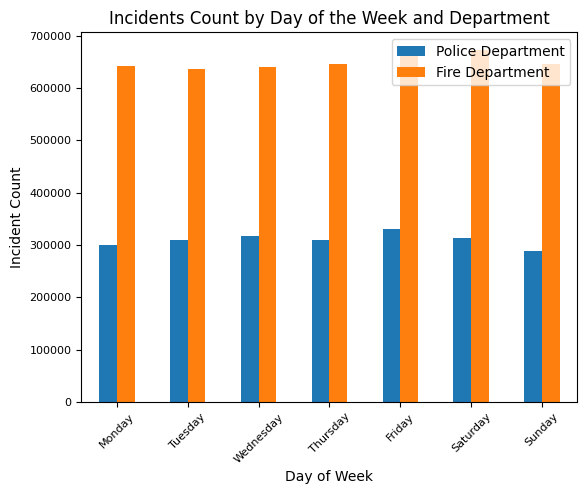

In [10]:
# Write query code, run it using the API and print and plot the results
QUERY = ("""
WITH pd_incidents_per_day AS (
SELECT dayofweek, COUNT(*) AS incident_count_pd
FROM {} AS pd
GROUP BY dayofweek
),
  fd_incidents_per_day AS (
  SELECT 
    CASE 
    WHEN EXTRACT(DAYOFWEEK FROM call_date) = 1 THEN 'Sunday'
    WHEN EXTRACT(DAYOFWEEK FROM call_date) = 2 THEN 'Monday'
    WHEN EXTRACT(DAYOFWEEK FROM call_date) = 3 THEN 'Tuesday'
    WHEN EXTRACT(DAYOFWEEK FROM call_date) = 4 THEN 'Wednesday'
    WHEN EXTRACT(DAYOFWEEK FROM call_date) = 5 THEN 'Thursday'
    WHEN EXTRACT(DAYOFWEEK FROM call_date) = 6 THEN 'Friday'
    ELSE 'Saturday'
    END as dayofweek, 
  COUNT(*) AS incident_count_fd
  FROM {} AS fd
  GROUP BY dayofweek
)
SELECT pd.dayofweek, pd.incident_count_pd, fd.incident_count_fd
FROM pd_incidents_per_day as pd
JOIN fd_incidents_per_day as fd
ON pd.dayofweek = fd.dayofweek
""".format(san_fan_pd_incidents,san_fan_fd_incidents))
query_job_2c = client.query(QUERY)  # API request
results_2c = query_job_2c.result()

schema = results_2c.schema
df_c = pd.DataFrame([row.values() for row in results_2c],
                  columns=[field.name for field in schema])
# Renaming columns
df_c.rename(columns={'incident_count_pd': 'Police Department','incident_count_fd': 'Fire Department' }, inplace=True)

# Defining order of days of week
df_c['dayofweek'] = df_c['dayofweek'].astype('category')
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_c['dayofweek'] = df_c['dayofweek'].cat.set_categories(ordered_days)
df_c = df_c.sort_values('dayofweek')

plot_2c = df_c.plot.bar(x='dayofweek', y=['Police Department','Fire Department'],
              title = 'Incidents Count by Day of the Week and Department',
              xlabel='Day of Week',
              ylabel= 'Incident Count',
              fontsize=8,
              rot=45)